In [1]:
!pip install seaborn
!pip install plotly.express

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 493.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.3 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [14]:
def load_dataset(csvfile):
    return pd.read_csv(csvfile)
dataset = load_dataset('googleplaystore.csv')

In [15]:
def print_summarize_dataset(dataset):
    print('The shape of dataset is', dataset.shape)
    print(dataset.describe(), '\n')
    print(dataset.head(), '\n')
    print(dataset.info())
print_summarize_dataset(dataset)

The shape of dataset is (10841, 13)
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000 

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M

In [181]:
def clean_dataset(df):
    filter = {'"': '', ',': '', ';': ' ', 'Everyone 10+': 'Everyone', 'Adults only 18+': 'Adults only', 'Mature 17+': 'Mature', 'Varies with device': 'NaN', 'Unrated': 'NaN', 'and up': ''}
    df.dropna(inplace=True)
    df.replace(filter, inplace=True, regex=True)
    df['Size'].replace({'M': '', 'K': ''}, inplace=True, regex=True)
    df['Reviews'] = df['Reviews'].astype(int)
    df['Content Rating'] = df['Content Rating'].str.replace('+', '')
    
    try: 
        df['Size'] = df['Size'].str.replace('k', 000).astype(float)
    except:
        df['Size'] = df['Size'].replace('k', 000).astype(float)
    try:
        df['Installs'] = df['Installs'].str.replace('+', '').astype(int)
    except:
        df['Installs'] = df['Installs'].replace('+', '').astype(int)
        
    try:
        df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)
    except:
        pass
    
    try:
        df['Price'] = df['Price'].str.replace('$', '')
    except:
        df['Price'] = df['Price'].replace('$', '')
    
    df.drop_duplicates(inplace=True)
    df['Last Updated'] = pd.to_datetime(df['Last Updated'])
    df['Rating'] = df['Rating'].astype(float)
    df['Price'] = df['Price'].astype(float)
    df['Popularity'] = df.Rating *10**7  * df.Reviews *10**2 * df.Installs
    return df
df = clean_dataset(dataset)
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,6.519000e+15
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design Pretend Play,2018-01-15,1.885650e+18
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,2.056485e+21
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.851990e+22
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design Creativity,2018-06-20,4.158100e+17
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,3.674000e+16
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,3.382000e+16
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,1.509415e+20
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,6.068040e+19
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design Creativity,2018-07-03,5.687000e+15


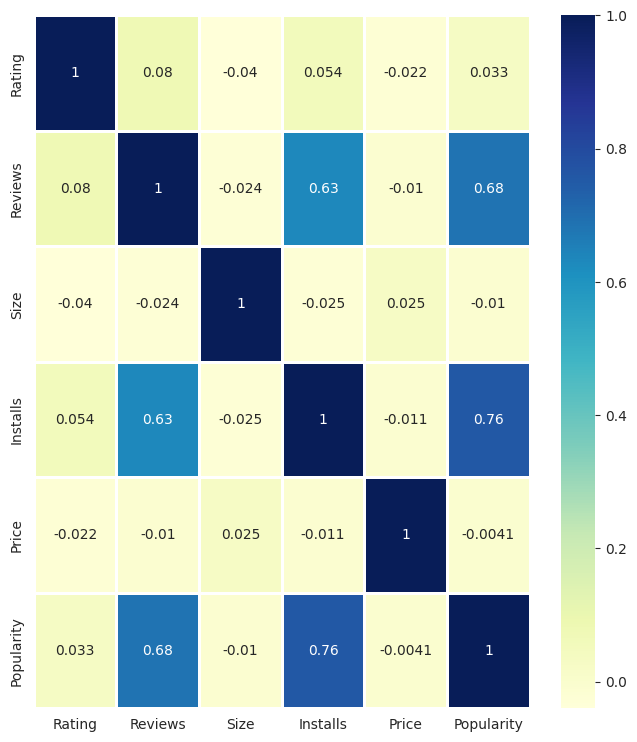

In [182]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(8, 9))
    sns.heatmap(data=dataset.corr(), annot=True, cmap="YlGnBu", linewidths=1)
    return plt.show()

df2 = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Popularity']]
df2.corr()
compute_correlations_matrix(df2)

In [257]:
class Visualize():
    def __init__(self, data):
        df = data
    
    def most_bar(self, x,data=df):
        cat_count = data[x].value_counts().reset_index()
        cat_count.columns = [x, 'Count']
        
        bar = px.bar(data_frame=cat_count, x=x, y='Count', color='Count')
        bar.update_layout(width=900, height=600)
        bar.show()
    
    def hist(self, x, color, log, data=df):
        fig = px.histogram(data_frame=data, x=x, color=color, log_y=log, nbins=50)
        fig.update_layout(width=700, height=600)
        fig.show()
        
    def rating_bar(self, x, y, color, data=df):
        
        fig = px.bar(data_frame=data, x=x, y=y, color=color)
        fig.show()

In [259]:
obj = Visualize(df)
# obj.most_bar('Category')
# obj.hist('Reviews', 'Type', True)
# obj.hist('Rating', 'Type', False)
# obj.rating_bar('Category', 'Rating', 'Rating')


# rating_bar = df.groupby('Category')['Rating'].mean()
# rating_bar = rating_bar[rating_bar > 4]
# obj.rating_bar(rating_bar.index, 'Rating', 'Rating', data=rating_bar)

df2